# Exercise 2.4

2.4. Calculate the c0...3 and r0...r3 for the series in exercise 2.1. Make a graph of r_k

These are T measurements every  minute on a chemical reactor:

200, 202, 208, 204, 204, 207, 207, 204, 202, 199, 201, 198, 200,
202, 203, 205, 207, 211, 204, 206, 203, 203, 201, 198, 200, 206,
207, 206, 200, 203, 203, 200, 200, 195, 202, 204.207, 206, 200

In a excel table: https://docs.google.com/spreadsheets/d/1j9tOtzPHds1UZ80QVovcja9qSclBMyXUBgoebrq8DN4/edit#gid=0

#Chatgpt

Now, open a Jupyter Notebook and follow these steps:

Import the required libraries.
Define the time series data.
Define a function to calculate the autocovariance for different time lags.
Calculate the autocovariance for each lag.
Plot the autocovariance function vs. time lag.
Here's how you can do it:



In [1]:
Temp = [200, 202, 208, 204, 204, 207, 207, 204, 202, 199, 201, 198, 200, 202, 203, 205, 207, 211, 204, 206, 203, 203, 201, 198, 200, 206, 207, 206, 200, 203, 203, 200, 200, 195, 202, 204.207, 206, 200
]

In [2]:
print(Temp)

[200, 202, 208, 204, 204, 207, 207, 204, 202, 199, 201, 198, 200, 202, 203, 205, 207, 211, 204, 206, 203, 203, 201, 198, 200, 206, 207, 206, 200, 203, 203, 200, 200, 195, 202, 204.207, 206, 200]


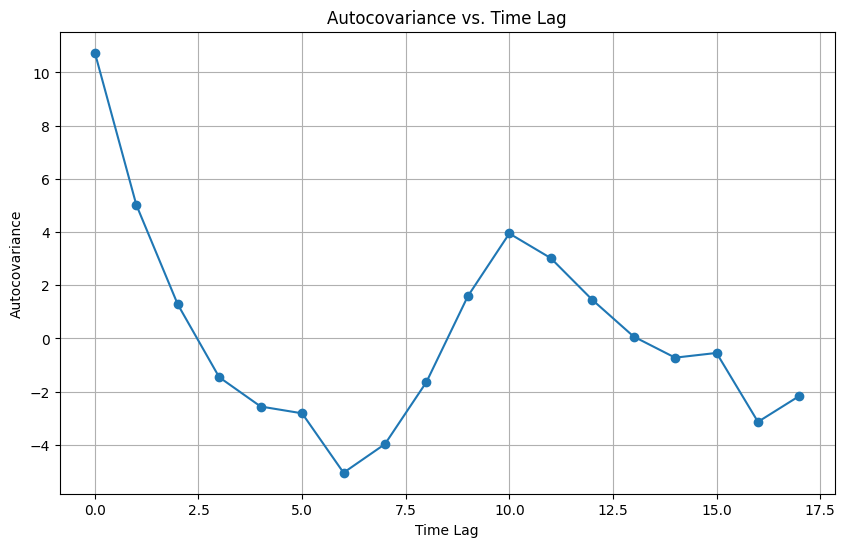

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time series data
data = [200, 202, 208, 204, 204, 207, 207, 204, 202, 199, 201, 198, 200, 202, 203, 205, 207, 211, 204, 206, 203, 203, 201, 198, 200, 206, 207, 206, 200, 203, 203, 200, 200, 195, 202, 204, 207, 206, 200]

# Function to calculate autocovariance
def autocovariance(data, lag):
    n = len(data)
    mean = np.mean(data)
    autocov = 0
    for i in range(n - lag):
        autocov += (data[i] - mean) * (data[i + lag] - mean)
    autocov /= n
    return autocov

# Calculate autocovariance for different lags
lags = range(18)
autocovariances = [autocovariance(data, lag) for lag in lags]

# Plot autocovariance function vs. time lag
plt.figure(figsize=(10, 6))
plt.plot(lags, autocovariances, marker='o', linestyle='-')
plt.title('Autocovariance vs. Time Lag')
plt.xlabel('Time Lag')
plt.ylabel('Autocovariance')
plt.grid(True)
plt.show()


In [5]:
import pandas as pd

# Calculate autocovariance for different lags
lags = range(4)
autocovariances = [autocovariance(data, lag) for lag in lags]

# Create a DataFrame to display the autocovariance values
table_data = {'Lag': lags, 'Autocovariance': autocovariances}
df = pd.DataFrame(table_data)

# Print the DataFrame
print(df)


   Lag  Autocovariance
0    0       10.742932
1    1        5.021022
2    2        1.278730
3    3       -1.458959


In [17]:
import pandas as pd

# Calculate autocovariance for different lags
lags = range(6)
autocovariances = [autocovariance(data, lag) for lag in lags]

# Calculate autocorrelation for different lags
autocorrelations = [covariance / autocovariances[0] for covariance in autocovariances]

# Create a DataFrame to display the autocorrelation values
table_data = {'Lag': lags, 'Autocorrelation': autocorrelations}
df = pd.DataFrame(table_data)

# Print the DataFrame
print(df)


   Lag  Autocorrelation
0    0         1.000000
1    1         0.467379
2    2         0.119030
3    3        -0.135806
4    4        -0.238317
5    5        -0.262187


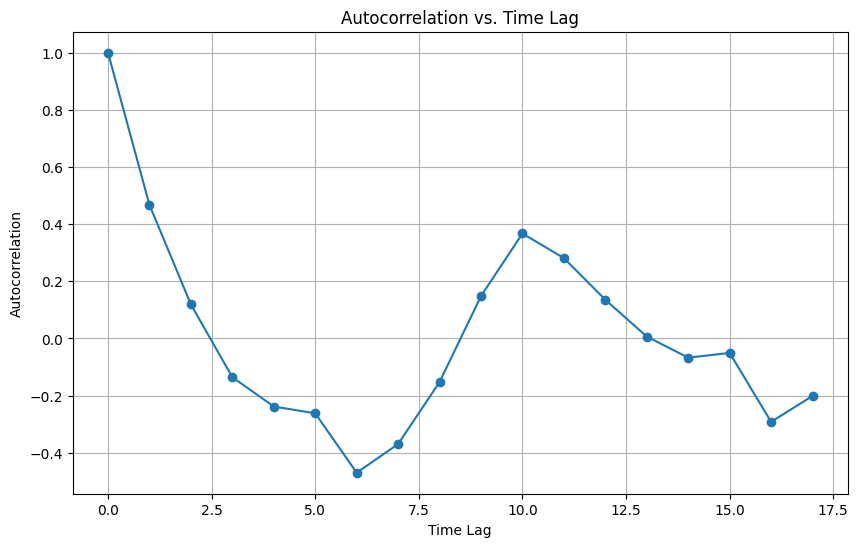

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time series data
data = [200, 202, 208, 204, 204, 207, 207, 204, 202, 199, 201, 198, 200, 202, 203, 205, 207, 211, 204, 206, 203, 203, 201, 198, 200, 206, 207, 206, 200, 203, 203, 200, 200, 195, 202, 204, 207, 206, 200]

# Function to calculate autocovariance
def autocovariance(data, lag):
    n = len(data)
    mean = np.mean(data)
    autocov = 0
    for i in range(n - lag):
        autocov += (data[i] - mean) * (data[i + lag] - mean)
    autocov /= n
    return autocov

# Calculate autocovariance for different lags
lags = range(18)
autocovariances = [autocovariance(data, lag) for lag in lags]

# Calculate autocorrelation for different lags
autocorrelations = [covariance / autocovariances[0] for covariance in autocovariances]

# Plot autocorrelations vs. time lag
plt.figure(figsize=(10, 6))
plt.plot(lags, autocorrelations, marker='o', linestyle='-')
plt.title('Autocorrelation vs. Time Lag')
plt.xlabel('Time Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


# Exercise 2.5

2.5. Calculate the standard error of the autocorrelation

For r_k converging to zero after certain time lag, the Bartlett's approximation can be used:

var[r_k] = 1/N (1 + 2 \sum r_k*r_k)

* var is the variance of autocorrelation
* N is the number of samples
* r_k is the autocorrelation for time lag k

In [8]:
import numpy as np

# Function to calculate standard error of autocorrelation
def autocorrelation_standard_error(autocorrelations, k):
    n = len(autocorrelations)
    if k == 0:
        return 1 / np.sqrt(n)
    else:
        acr_sum = sum([autocorrelations[i]**2 for i in range(1, k)])
        return np.sqrt((1 + 2 * acr_sum) / n)

# Calculate standard errors for autocorrelations with different lags
standard_errors = [autocorrelation_standard_error(autocorrelations, k) for k in range(18)]

# Print standard errors
for lag, se in enumerate(standard_errors):
    print(f"Lag {lag}: Standard Error = {se:.4f}")


Lag 0: Standard Error = 0.2357
Lag 1: Standard Error = 0.2357
Lag 2: Standard Error = 0.2825
Lag 3: Standard Error = 0.2853
Lag 4: Standard Error = 0.2889
Lag 5: Standard Error = 0.2996
Lag 6: Standard Error = 0.3121
Lag 7: Standard Error = 0.3492
Lag 8: Standard Error = 0.3703
Lag 9: Standard Error = 0.3738
Lag 10: Standard Error = 0.3771
Lag 11: Standard Error = 0.3964
Lag 12: Standard Error = 0.4074
Lag 13: Standard Error = 0.4098
Lag 14: Standard Error = 0.4099
Lag 15: Standard Error = 0.4105
Lag 16: Standard Error = 0.4108
Lag 17: Standard Error = 0.4222


We can observe that the standard error increases 

In [10]:
# Compute the correlation coefficient between r4 and r5
#correlation_r4_r5 = np.corrcoef(autocorrelations[4], autocorrelations[5])[0, 1]

#print("Correlation between r4 and r5:", correlation_r4_r5)


In [27]:

print("",autocorrelations)

print("Covariance between r4 & r5: ", 1/4*
      (autocorrelations[2]*autocorrelations[3]+
       autocorrelations[3]*autocorrelations[4]+autocorrelations[4]*autocorrelations[5]+autocorrelations[5]*autocorrelations[6]+autocorrelations[6]*autocorrelations[7]))

 [1.0, 0.4673790917364969, 0.11902990929918708, -0.13580642124093772, -0.2383171703857139, -0.2621865486614569, -0.47008285472177724, -0.3697784263879735, -0.15270533220349622, 0.14796629319273133, 0.36730376926215347, 0.2810720898848192, 0.135354486394878, 0.006527947776417874, -0.06734143049932512, -0.05081913190848305, -0.2920691711389383, -0.20125066691774143]
Covariance between r4 & r5:  0.09393985799335056


**2.6. ACF of Annual Sales & Log Transformation**

The annual sales of mink furs by a North American company during 1911--1950

are included as Series N in Part Five of this book. The series is also available at

http://pages.stat.wisc.edu/ reinsel/bjr-data/.
(a) Plot the time series using R. Calculate and plot the sample autocorrelation func-

tion of the series.

(b) Repeat the analysis in part (a) for the logarithm of the series. Do you see an

advantage in using the log transformation in this case?

In [8]:
def text_to_csv(text):
  """
  Converts the given text into a CSV series.

  Args:
    text: The input text containing the series data.

  Returns:
    A string representing the CSV series.
  """

  # 1. Extract data using regular expressions (adjust as needed)
  import re
  lines = text.split('\n')
  data = []
  for line in lines:
    match = re.match(r'(\d{4})\s+([0-9,]+)', line) 
    if match:
      year, value = match.groups()
      value = value.replace(',', '')  # Remove commas from numbers
      data.append((year, value))

  # 2. Create CSV string
  csv_string = "Year,Value\n"
  for row in data:
    csv_string += f"{row[0]},{row[1]}\n"

  return csv_string

# Get the text from the user
text = """
SERIES N Mink Fur Sales of the Hudson’s Bay Company: Annual for 1850--1911 𝑎
1850 𝑎 62
1851 29,619
1852 21,151
1853 24,859
1854 25,152
1855 42,375
1856 50,839
1857 61,581
1858 61,951
1859 76,231
1860 63,264
1861 44,730
1862 31,094
1863 49,452
1864 43,961
1865 61,727
1866 60,334
1867 51,404
1868 58,451
1869 73,575
1870 74,343
1871 27,708
1872 31,985
1873 39,266
1874 44,740
1875 60,429
1876 72,273
1877 79,214
1878 79,060
1879 84,244
1880 62,590
1881 35,072
1882 36,160
1883 45,600
1884 47,508
1885 52,290
1886 110,824
1887 76,503
1888 64,303
1889 83,023
1890 40,748
1891 35,596
1892 29,479
1893 42,264
1894 58,171
1895 50,815
1896 51,285
1897 70,229
1898 76,365
1899 70,407
1900 41,839
1901 45,978
1902 47,813
1903 57,620
1904 66,549
1905 54,673
1906 55,996
1907 60,053
1908 39,169
1909 21,534
1910 17,857
1911 21,788
1912 33,008
"""

# Generate CSV 
csv_data = text_to_csv(text)
print(csv_data)


Year,Value
1851,29619
1852,21151
1853,24859
1854,25152
1855,42375
1856,50839
1857,61581
1858,61951
1859,76231
1860,63264
1861,44730
1862,31094
1863,49452
1864,43961
1865,61727
1866,60334
1867,51404
1868,58451
1869,73575
1870,74343
1871,27708
1872,31985
1873,39266
1874,44740
1875,60429
1876,72273
1877,79214
1878,79060
1879,84244
1880,62590
1881,35072
1882,36160
1883,45600
1884,47508
1885,52290
1886,110824
1887,76503
1888,64303
1889,83023
1890,40748
1891,35596
1892,29479
1893,42264
1894,58171
1895,50815
1896,51285
1897,70229
1898,76365
1899,70407
1900,41839
1901,45978
1902,47813
1903,57620
1904,66549
1905,54673
1906,55996
1907,60053
1908,39169
1909,21534
1910,17857
1911,21788
1912,33008



In [20]:
import pandas as pd
from io import StringIO
# Create a pandas Series from the CSV data
df = pd.read_csv(StringIO(csv_data))  # StringIO to handle string input
series = df['Value'] 


# Print the series
print(series) 

# Example usage:
print("First 5 values:", series.head())
print("Last 5 values:", series.tail())
print("Mean:", series.mean())
print("Standard Deviation:", series.std())

0     29619
1     21151
2     24859
3     25152
4     42375
      ...  
57    39169
58    21534
59    17857
60    21788
61    33008
Name: Value, Length: 62, dtype: int64
First 5 values: 0    29619
1    21151
2    24859
3    25152
4    42375
Name: Value, dtype: int64
Last 5 values: 57    39169
58    21534
59    17857
60    21788
61    33008
Name: Value, dtype: int64
Mean: 52066.467741935485
Standard Deviation: 19011.847824334793


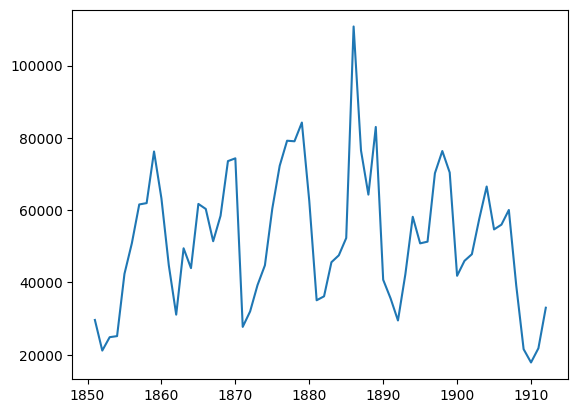

In [78]:
plt.plot(df['Year'],df['Value'])

In [30]:
print(df)

    Year  Value
0   1851  29619
1   1852  21151
2   1853  24859
3   1854  25152
4   1855  42375
..   ...    ...
57  1908  39169
58  1909  21534
59  1910  17857
60  1911  21788
61  1912  33008

[62 rows x 2 columns]


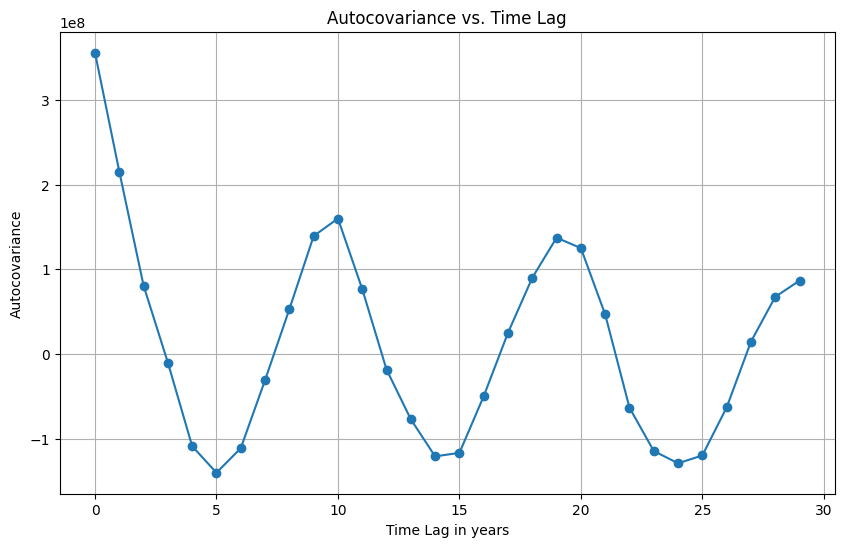

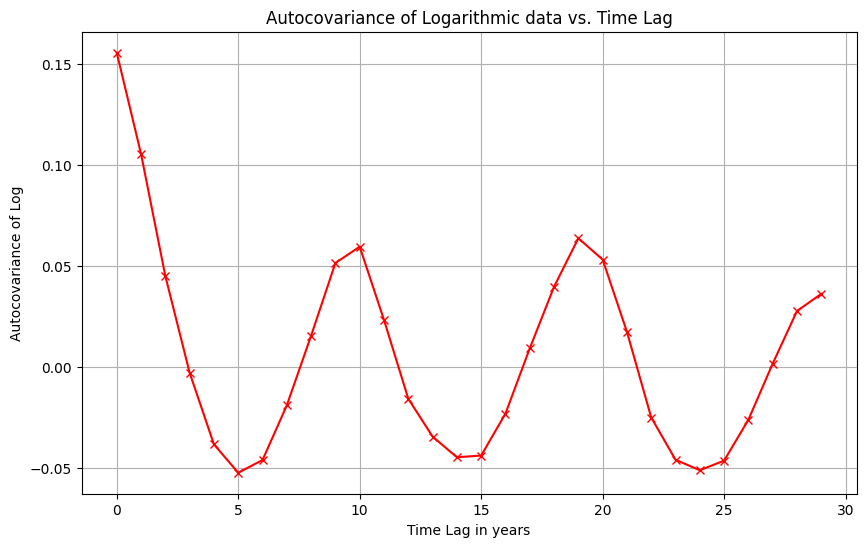

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time series data
data_log = np.log(df['Value'])
data = df['Value']
# Function to calculate autocovariance
def autocovariance(data, lag):
    n = len(data)
    mean = np.mean(data)
    autocov = 0
    for i in range(n - lag):
        autocov += (data[i] - mean) * (data[i + lag] - mean)
    autocov /= n
    return autocov

# Calculate autocovariance for different lags
lags = range(30)
autocovariances = [autocovariance(data, lag) for lag in lags]
autocovariances_log = [autocovariance(data_log, lag) for lag in lags]
# Plot autocovariance function vs. time lag
plt.figure(figsize=(10, 6))
plt.plot(lags, autocovariances, marker='o', linestyle='-')
plt.title('Autocovariance vs. Time Lag')
plt.xlabel('Time Lag in years')
plt.ylabel('Autocovariance')
plt.grid(True)


plt.show()
plt.close()

plt.figure(figsize=(10, 6))
plt.plot(lags, autocovariances_log, marker='x', linestyle='-', color='red')
plt.title('Autocovariance of Logarithmic data vs. Time Lag')
plt.xlabel('Time Lag in years')
plt.ylabel('Autocovariance of Log')
plt.grid(True)

plt.show()

/tmp/ipykernel_61101/1834655129.py:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(acf_values)), acf_values, basefmt=" ", use_line_collection=True, markerfmt='bo', linefmt='b-')


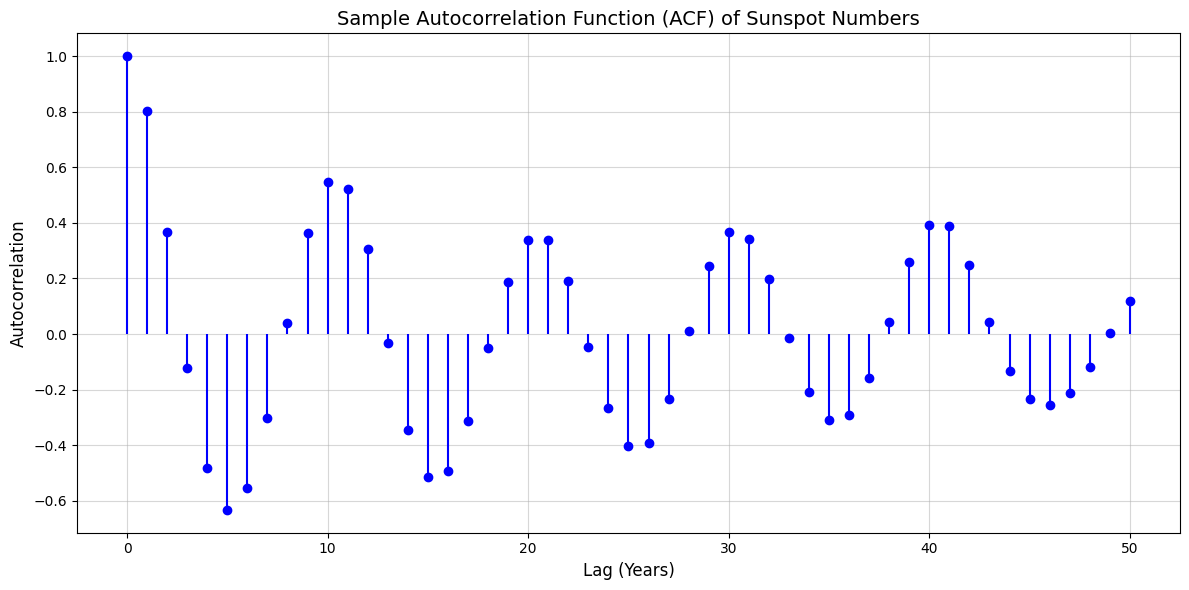

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Replace 'sunspot_numbers' with your data array
sunspot_numbers = [
    85.9, 68.1, 70.5, 66.3, 64.2, 24.1, 17.6, 26.7, 58.3, 114.2, 125.8, 103.5,
    83.2, 62.4, 39.6, 25.9, 15.8, 7.5, 16.2, 36.5, 79.2, 118.1, 124.1, 83.5,
    62.5, 39.8, 26.8, 13.9, 7.1, 14.8, 32.5, 51.1, 67.8, 71.3, 50.4, 25.8,
    12.9, 7.4, 20.3, 64.5, 103.6, 132.4, 124.2, 96.5, 68.4, 43.1, 24.9, 15.7,
    41.9, 81.7, 118.5, 124.5, 83.7, 62.6, 43.2, 27.5, 13.8, 4.8, 5.6, 16.7,
    41.5, 85.1, 100.3, 81.9, 60.7, 40.8, 26.1, 14.7, 6.8, 7.3, 20.1, 46.8
]

# Compute the autocorrelation function
acf_values = sm.tsa.acf(sunspot_numbers, nlags=50, fft=True)

# Plot the ACF
plt.figure(figsize=(12, 6))
plt.stem(range(len(acf_values)), acf_values, basefmt=" ", use_line_collection=True, markerfmt='bo', linefmt='b-')
plt.title("Sample Autocorrelation Function (ACF) of Sunspot Numbers", fontsize=14)
plt.xlabel("Lag (Years)", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipykernel_61101/1863415322.py:6: RuntimeWarning: invalid value encountered in sqrt
  plt.stem(range(len(acf_values)), np.sqrt(acf_values), basefmt=" ",
/tmp/ipykernel_61101/1863415322.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(acf_values)), np.sqrt(acf_values), basefmt=" ",


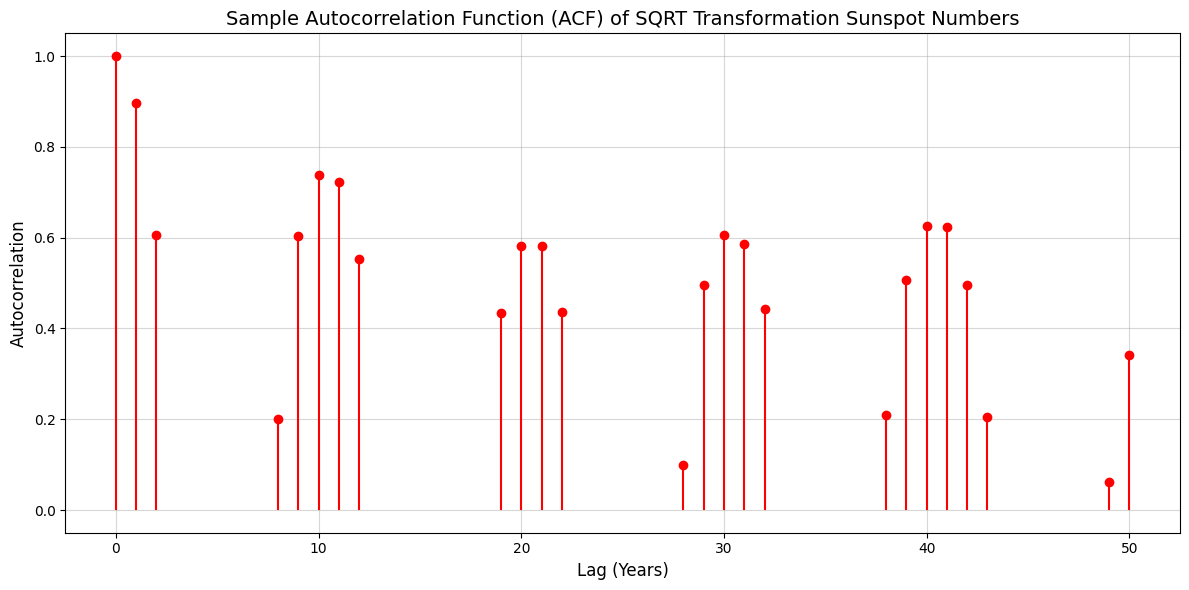

In [2]:
# Compute the autocorrelation function
acf_values = sm.tsa.acf(sunspot_numbers, nlags=50, fft=True)

# Plot the ACF
plt.figure(figsize=(12, 6))
plt.stem(range(len(acf_values)), np.sqrt(acf_values), basefmt=" ",
         use_line_collection=True, markerfmt='ro', linefmt='r-')
plt.title("Sample Autocorrelation Function (ACF) of SQRT Transformation Sunspot Numbers", fontsize=14)
plt.xlabel("Lag (Years)", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
